In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Bài 1

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]

### Câu 1: Vẽ biểu đồ cho dữ liệu (X, y)

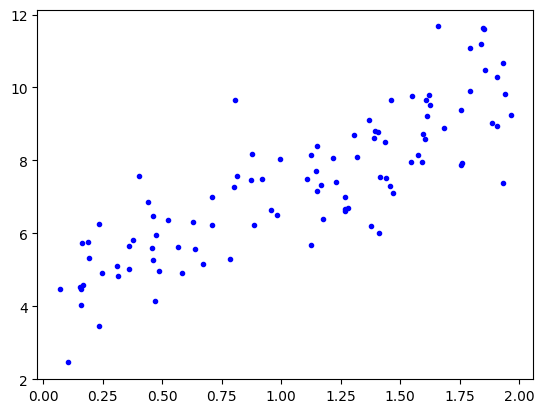

In [4]:
plt.plot(X, y, "b.")

### Câu 2: Hãy cho biết shape của X_b và y

In [5]:
print(f"So chieu cua X_b: {X_b.shape}")
print(f"So chieu cua y: {y.shape}")

So chieu cua X_b: (100, 2)
So chieu cua y: (100, 1)


### Câu 3: Tìm tham số tối ưu cho mô hình bằng phương trình 
$\theta = (X^TX)^{-1}X^Ty $

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.26328903],
       [2.87765761]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

### Câu 4: Dùng tham số tối ưu vừa tính được ở câu 3, dự đoán kết quả cho X_new_b và lưu kết quả vào biến y_pred
$\hat{y} = \theta X_{new-b}$

In [ ]:
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.26328903],
       [10.01860424]])

In [14]:
print(theta_best.shape)
print(X_new.shape)
print(X_new_b.shape)

(2, 1)
(2, 1)
(2, 2)


### Câu 5: Vẽ biểu đồ thể hiện kết quả dự đoán trên dữ liệu

* Chú thích:
    * X_new là tập dữ liệu mà ta muốn dự đoán giá trị $\hat{y}$ tương ứng nhưng chưa có phần bias term, và có kích thước là (2, 1) trong khi tham số tối ưu có kích thước là (2, 1) nên không thể tính được $\hat{y}$
    * X_new_b là phiên bản mới rộng của X_new khi thêm một cột chỉ chứa giá trị 1 để tính bias, và có kích thước là (2, 2). Khi này ta mới có thể tính $\hat{y}$ bằng cách lấy tích vô hướng của X_new_b và tham số tối ưu $\theta$
    * Tuy nhiên khi vẽ trên biểu đồ kết quả, chỉ sử dụng tham số là X_new và y, không sử dụng tham số X_new_b vì X_new mới mô tả đúng dữ liệu thực tế mà ta cần dự đoán, trong khi X_new_b chỉ là dữ liệu được mở rộng để tính giá trị dự đoán

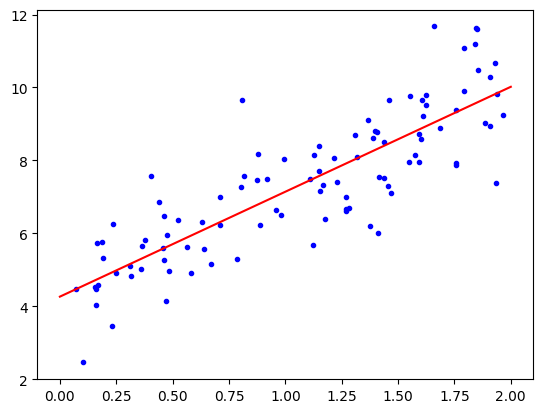

In [15]:
# First chart
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-")

## Bài 2

In [85]:
m= 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [86]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

In [87]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [94]:
X_poly

array([[-2.83491096e+00,  8.03672014e+00],
       [ 9.32209584e-01,  8.69014708e-01],
       [ 1.34576758e+00,  1.81109039e+00],
       [-1.57991440e+00,  2.49612953e+00],
       [ 8.75541597e-01,  7.66573089e-01],
       [ 2.18483836e+00,  4.77351865e+00],
       [ 2.07953854e+00,  4.32448054e+00],
       [ 2.88381270e+00,  8.31637571e+00],
       [-1.78321035e+00,  3.17983916e+00],
       [ 2.23891552e+00,  5.01274269e+00],
       [-2.50325868e+00,  6.26630403e+00],
       [ 8.92547366e-01,  7.96640800e-01],
       [ 2.43469980e+00,  5.92776310e+00],
       [-1.90463781e+00,  3.62764517e+00],
       [ 2.62442793e+00,  6.88762195e+00],
       [-7.05869844e-01,  4.98252237e-01],
       [ 1.93482481e-01,  3.74354706e-02],
       [-2.49761572e+00,  6.23808428e+00],
       [ 2.68809093e+00,  7.22583284e+00],
       [-5.39698779e-01,  2.91274773e-01],
       [ 9.33121026e-01,  8.70714849e-01],
       [-1.05977459e+00,  1.12312219e+00],
       [ 1.64772537e+00,  2.71499888e+00],
       [ 1.

* Nhận xét:
    * Hàm PolynomialFeatures(degree=2) dùng để biến đổi X thành dữ liệu bậc 2
    * Dựa trên X_poly được in ra, thấy rằng nếu X = [$x_1$], sau khi biến đổi trở thành X_Poly = [$x_1, x_1^2$]

In [88]:
X_b = np.c_[np.ones((100, 1)), X_poly]

In [89]:
print(X_b.shape)
print(y.shape)

(100, 3)
(100, 1)


* Dữ liệu huấn luyện sẽ là X_poly và y
* Sử dụng công thức tính tham số tối ưu như câu 1: $\theta = (X^TX)^{-1}X^Ty$

In [90]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[2.25384524],
       [0.86100763],
       [0.44901174]])

* Chuẩn bị dữ liệu mới để dự đoán và hiển thị kết quả, trong đó:
    * X_new là dữ liệu mới dùng để dự đoán
    * X_new_poly dùng để biến đổi X_new từ dữ liệu bậc 1 thành dữ liệu bậc 2
    * X_new_b như ở bài 1, là dạng mở rộng khi được thêm một cột với giá trị toàn là 1, dùng để tính toán $\hat{y}$

In [91]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
X_new_b = np.c_[np.ones((100, 1)), X_new_poly]

In [92]:
y_pred = X_new_b.dot(theta_best)
y_pred

array([[3.71192807],
       [3.60248261],
       [3.49633568],
       [3.39348728],
       [3.2939374 ],
       [3.19768604],
       [3.10473321],
       [3.01507891],
       [2.92872313],
       [2.84566588],
       [2.76590715],
       [2.68944695],
       [2.61628527],
       [2.54642212],
       [2.47985749],
       [2.41659139],
       [2.35662381],
       [2.29995476],
       [2.24658423],
       [2.19651223],
       [2.14973875],
       [2.1062638 ],
       [2.06608738],
       [2.02920948],
       [1.9956301 ],
       [1.96534925],
       [1.93836693],
       [1.91468313],
       [1.89429785],
       [1.8772111 ],
       [1.86342288],
       [1.85293318],
       [1.84574201],
       [1.84184936],
       [1.84125524],
       [1.84395964],
       [1.84996257],
       [1.85926402],
       [1.871864  ],
       [1.8877625 ],
       [1.90695953],
       [1.92945508],
       [1.95524916],
       [1.98434176],
       [2.01673289],
       [2.05242255],
       [2.09141073],
       [2.133

* Tham số dùng để hiển thị kết quả tương ứng với bài 1

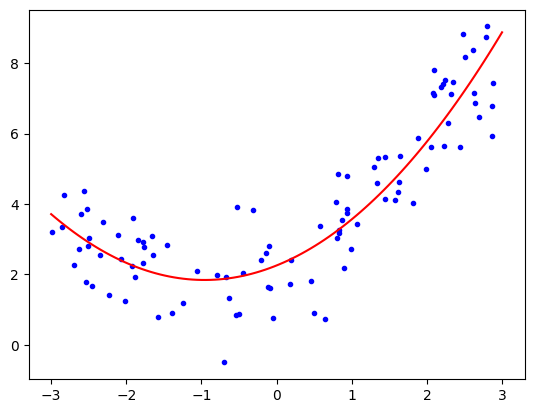

In [93]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-")

## Bài 3: Ridge Regression

In [95]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [96]:
X_b = np.c_[np.ones((100, 1)), X]

In [97]:
print(f"So chieu cua X_b: {X_b.shape}")
print(f"So chieu cua y: {y.shape}")

So chieu cua X_b: (100, 2)
So chieu cua y: (100, 1)


* In ra kích thước của ma trận $X^TX$ để điều chỉnh ma trận đơn vị cho phù hợp 

In [98]:
print((X_b.T.dot(X_b)).shape)

(2, 2)


* Công thức tính tham số tối ưu: $\theta = (X^TX + \alpha I)^{-1}X^Ty $

In [99]:
I = np.identity(2)
alpha = 0.02
theta_best = np.linalg.inv(X_b.T.dot(X_b) + alpha * (I)).dot(X_b.T).dot(y)
theta_best

array([[3.74746235],
       [3.30610652]])

In [100]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [101]:
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 3.74746235],
       [10.35967538]])

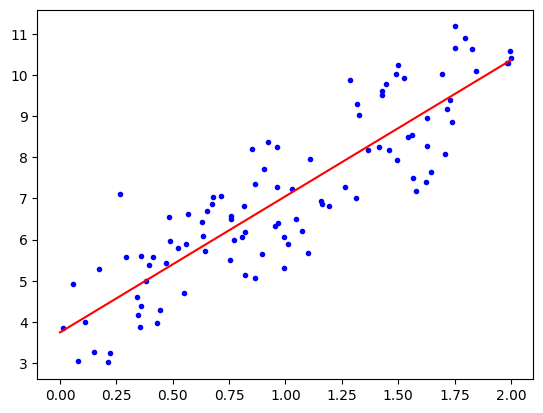

In [102]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-")

## Bài 4

#### Linear Regression with Scikit-Learn 

In [103]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [104]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [105]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [106]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [107]:
y_pred_manual = X_new_b.dot(theta_best)  
y_pred_sklearn = lr.predict(X_new)

In [108]:
print(y_pred_manual)
print(y_pred_sklearn)

[[4.12549094]
 [9.53606807]]
[[4.12549094]
 [9.53606807]]


In [109]:
print(theta_best)
print(lr.intercept_[0], lr.coef_[0][0])

[[4.12549094]
 [2.70528857]]
4.125490936599231 2.705288568626444


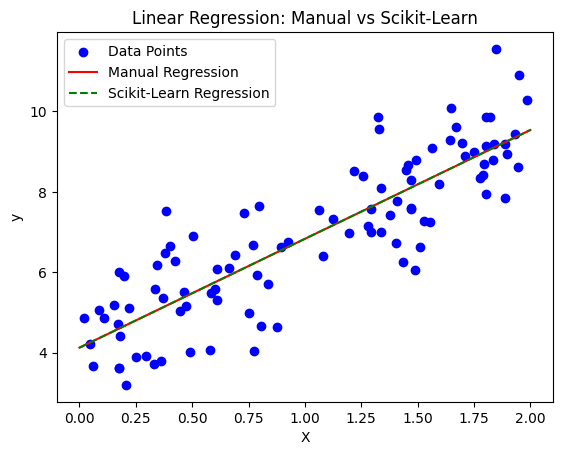

In [110]:
plt.scatter(X, y, color="blue", label="Data Points")  
plt.plot(X_new, y_pred_manual, "r-", label="Manual Regression")  
plt.plot(X_new, y_pred_sklearn, "g--", label="Scikit-Learn Regression") 
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Manual vs Scikit-Learn")
plt.legend()
plt.show()

#### Ridge Regression with Scikit-learn

In [111]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [112]:
X_b = np.c_[np.ones((100, 1)), X]

In [113]:
I = np.identity(2)
alpha = 0.02
theta_best = np.linalg.inv(X_b.T.dot(X_b) + alpha * (I)).dot(X_b.T).dot(y)
theta_best

array([[4.09972822],
       [3.03937091]])

In [114]:
from sklearn.linear_model import Ridge

R = Ridge(alpha=alpha, fit_intercept=True)
R.fit(X, y)

Ridge(alpha=0.02)

In [115]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] 


In [116]:
y_pred_manual = X_new_b.dot(theta_best)  
y_pred_sklearn = R.predict(X_new)

In [117]:
print(y_pred_manual)
print(y_pred_sklearn)

[[ 4.09972822]
 [10.17847003]]
[[ 4.10353584]
 [10.17659757]]


In [118]:
print(theta_best.ravel())
print(R.intercept_, R.coef_[0][0])

[4.09972822 3.03937091]
[4.10353584] 3.0365308662957307


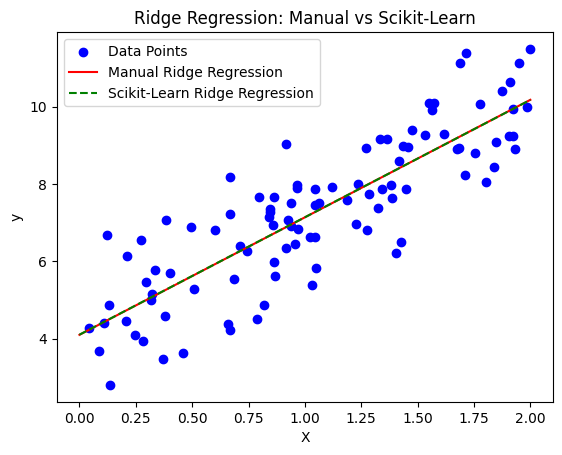

In [119]:
plt.scatter(X, y, color="blue", label="Data Points")  
plt.plot(X_new, y_pred_manual, "r-", label="Manual Ridge Regression")  
plt.plot(X_new, y_pred_sklearn, "g--", label="Scikit-Learn Ridge Regression") 
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression: Manual vs Scikit-Learn")
plt.legend()
plt.show()

#### So sánh tham số tối ưu và kết quả thu được giữa việc thực hiện bằng tay và bằng thư viện Scikit-learn của hai mô hình Linear Regression và Ridge Regression

* Linear Regression:
    * Bằng tay:
        * $\theta$ = [4.12549094, 2.70528857]
        * y_pred = [4.1254909, 9.53606807]
    * Bằng thư viện Scikit-learn:
        * $\theta$ = [4.125490936599231, 2.705288568626444]
        * y_pred = [4.1254909, 9.53606807]
* Ridge Regression:
    * Bằng tay:
        * $\theta$ = [4.09972822, 3.03937091]
        * y_pred = [4.09972822, 10.17847003]
    * Bằng thư viện Scikit-learn:
        * $\theta$ = [4.10353584, 3.0365308662957307]
        * y_pred = [4.10353584, 10.17659757]

* Nhận xét
    * Đối với Linear Regression, tham số tối ưu và giá trị dự đoán gần như giống nhau ở cả hai phương thức bằng tay và bằng thư viện
    * Đối với Ridge Regression, tham số tối ưu và giá trị dự đoán có sự chênh lệch nhỏ. Theo như tìm hiểu, nguyên nhân xảy ra sự chênh lệch như vậy là do đối với việc thực hiện bằng tay thì tham số tối ưu với ma trận nghịch đảo được tính trực tiếp bằng np.linalg.inv trong khi đối với thư viện scikit-learn thì có dùng thể dùng nhiều thuật toán tối ưu hóa như Cholesky, SVD,... Từ đó có sự chênh lệch giữa hai kết quả của $\theta$ dẫn đến $\hat{y}$ cũng có phần chênh lệch. 